In [4]:
#IMPORT BASIC REQUIRED PACKAGE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
#READ DATA
data=pd.read_csv("Airquality1.csv")
print(data)

            Date      Time  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0     11/23/2004  19:00:00   11.9        2008     -200     50.6          1980   
1     11/23/2004  20:00:00   11.5        1918     -200     49.4          1958   
2     11/17/2004  18:00:00   10.2        1802     -200     47.7          1924   
3     11/23/2004  18:00:00   10.2        1982     -200     49.5          1959   
4     11/26/2004  18:00:00   10.1        1956     -200     45.2          1877   
...          ...       ...    ...         ...      ...      ...           ...   
9352   3/23/2005   4:00:00 -200.0         993     -200      2.3           604   
9353   3/26/2005   4:00:00 -200.0        1122     -200      6.0           811   
9354   3/29/2005   4:00:00 -200.0         883     -200      1.3           530   
9355    4/1/2005   4:00:00 -200.0         818     -200      0.8           473   
9356    4/4/2005   4:00:00 -200.0         864     -200      0.8           478   

      Nox_GT  PT08_S3_Nox  

In [6]:
#MISSING VALUE CHAKING
data.isnull().sum()


Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [7]:
#SEE COLUMNS
data.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

In [8]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
#DEFINE NEW VARIABLE AS CAT
cat=['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level']

In [10]:
data[cat]=data[cat].apply(le.fit_transform)

In [11]:
#READ DATA
data

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,77,10,96,1040,0,403,1241,924,2,215,1582,1724,134,638,3736,3
1,77,12,95,1033,0,401,1239,922,6,185,1563,1712,125,653,3474,3
2,70,9,94,1008,0,399,1237,723,17,187,1468,1735,147,419,2249,3
3,77,9,94,1039,0,402,1240,923,1,222,1575,1730,142,617,3848,3
4,80,9,93,1035,0,395,1232,924,11,250,1516,1736,165,519,3870,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,180,18,0,299,0,23,181,82,492,60,454,471,155,555,3836,4
9353,186,18,0,428,0,60,388,178,285,87,630,831,172,603,4785,4
9354,192,18,0,189,0,13,107,60,641,41,397,326,147,573,3655,4
9355,205,18,0,124,0,8,53,44,897,36,196,42,147,379,1910,4


In [13]:
#X AND Y DEFINE
x=data.iloc[:,2:-1]
x

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,96,1040,0,403,1241,924,2,215,1582,1724,134,638,3736
1,95,1033,0,401,1239,922,6,185,1563,1712,125,653,3474
2,94,1008,0,399,1237,723,17,187,1468,1735,147,419,2249
3,94,1039,0,402,1240,923,1,222,1575,1730,142,617,3848
4,93,1035,0,395,1232,924,11,250,1516,1736,165,519,3870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0,299,0,23,181,82,492,60,454,471,155,555,3836
9353,0,428,0,60,388,178,285,87,630,831,172,603,4785
9354,0,189,0,13,107,60,641,41,397,326,147,573,3655
9355,0,124,0,8,53,44,897,36,196,42,147,379,1910


In [14]:
y=data["CO_level"]
y

0       3
1       3
2       3
3       3
4       3
       ..
9352    4
9353    4
9354    4
9355    4
9356    4
Name: CO_level, Length: 9357, dtype: int32

In [15]:
#SCALLING TO X
from sklearn.preprocessing import scale

In [16]:
scale_x=scale(x)

In [18]:
#NORMALISING TO X
from sklearn.preprocessing import normalize

In [19]:
nor_x=normalize(x)

In [21]:
#SPLITTING DATA

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
x_test.shape

(1872, 13)

In [24]:
x_train.shape

(7485, 13)

In [25]:
#desigion tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=dtc.predict(x_test)

In [42]:
y_pred

array([0, 4, 0, ..., 0, 0, 0])

In [43]:
df=pd.DataFrame({"Actual":y_test,"predict":y_pred})
df

,Actual,predict
1121,0,0
8028,4,4
3803,0,0
4595,0,0
587,0,0
...,...,...
1386,0,0
5835,2,2
713,0,0
200,0,0


In [44]:
dtc=(accuracy_score(y_test,y_pred)*100)
dtc

100.0

In [45]:
#random forest classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [47]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 4, 0, ..., 0, 0, 0])

In [49]:
df=pd.DataFrame({"Actual":y_test,"predict":y_pred})
df

,Actual,predict
1121,0,0
8028,4,4
3803,0,0
4595,0,0
587,0,0
...,...,...
1386,0,0
5835,2,2
713,0,0
200,0,0


In [50]:
rfc=(accuracy_score(y_test,y_pred)*100)
rfc

99.94658119658119

In [61]:
print(confusion_matrix(y_test,y_pred))

[[1104   28    4    0   22]
 [  57  219    1    0   20]
 [  34   33    0    0    4]
 [   1    0    0    0    0]
 [ 118   78    0    0  149]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1158
           1       0.61      0.74      0.67       297
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00         1
           4       0.76      0.43      0.55       345

    accuracy                           0.79      1872
   macro avg       0.44      0.42      0.42      1872
weighted avg       0.76      0.79      0.76      1872



C:\Users\Amol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
#kmeans

In [65]:
 from sklearn.neighbors import KNeighborsClassifier
    

In [66]:
knc=KNeighborsClassifier(n_neighbors=17)

In [67]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [68]:
y_pred=knc.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [69]:
df=pd.DataFrame({"Actual":y_test,"predict":y_pred})
df

,Actual,predict
1121,0,0
8028,4,1
3803,0,0
4595,0,0
587,0,0
...,...,...
1386,0,0
5835,2,0
713,0,0
200,0,0


In [70]:
knc=(accuracy_score(y_test,y_pred)*100)
knc

78.63247863247864

In [71]:
#support vector machine

In [72]:
from sklearn.svm import SVC
svm=SVC()

In [73]:
svm.fit(x_train,y_train)

SVC()

In [74]:
y_pred=svm.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [75]:
df=pd.DataFrame({"Actual":y_test,"predict":y_pred})
df

,Actual,predict
1121,0,0
8028,4,1
3803,0,0
4595,0,0
587,0,0
...,...,...
1386,0,0
5835,2,0
713,0,0
200,0,0


In [76]:
svm=(accuracy_score(y_test,y_pred)*100)
svm

80.50213675213675

In [78]:
print(confusion_matrix(y_test,y_pred))

[[1107   24    0    0   27]
 [  69  218    0    0   10]
 [  37   31    0    0    3]
 [   1    0    0    0    0]
 [  75   88    0    0  182]]


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1158
           1       0.60      0.73      0.66       297
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00         1
           4       0.82      0.53      0.64       345

    accuracy                           0.81      1872
   macro avg       0.46      0.44      0.44      1872
weighted avg       0.78      0.81      0.78      1872



C:\Users\Amol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
name=pd.DataFrame({
    'model':["kms","desicsion tre","Random forest","Support vector machine"],
    'score':[kms,dtc,rfc,svm]
})

In [229]:
name

,model,score
0,kms,78.632479
1,desicsion tre,100.000000
2,Random forest,99.893162
3,Support vector machine,80.502137



 	 accuracy score of all algorithms


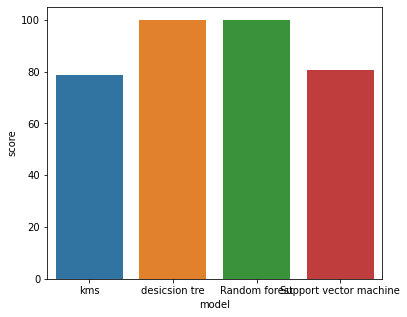

In [230]:
print("\n \t accuracy score of all algorithms")
plt.figure(figsize=(6,5))
sns.barplot(x="model",y="score",data=name)
plt.show()